#### Multicalssification for recognizing hand written digits

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# reading the data
import scipy.io
mat = scipy.io.loadmat('ex3data1.mat')
print("the shape of the image :",mat['X'].shape)
print("the classified image :",mat['y'].shape)


the shape of the image : (5000, 400)
the classified image : (5000, 1)


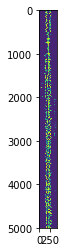

In [3]:
plt.figure(figsize=(4,4))
plt.imshow(mat['X'][:,:])

In [4]:
feat=mat["X"]
target=mat['y']

In [5]:
k=feat[2565,:]
k=k.reshape((20,20))
print(k)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.22294240e-05
   1.15571870e-03 -1.06901472e-02 -3.72834373e-02 -1.64591741e-02
  -2.04639028e-04  1.26921590e-04  0.00000000e+00  0.00000000e+00]
 [ 0.00

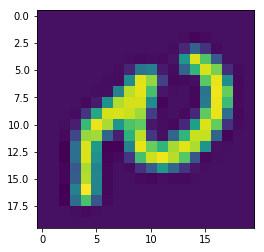

In [6]:
plt.imshow(k)

In [7]:
testt=target

In [8]:
# now we have to split the data in to the training and test dataset
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(feat,target,test_size=0.2,random_state=0)

/home/sai/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
training_set=y_train

In [10]:
testing=y_test
# the sizes of the test and train set of the data
print("the shape of the training dataset is :",x_train.shape,y_train.shape)
print("the shape of the test dataset is :",x_test.shape,y_test.shape)

the shape of the training dataset is : (4000, 400) (4000, 1)
the shape of the test dataset is : (1000, 400) (1000, 1)


In [11]:
# ceating the dummy variables 
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
labelencoder_X = LabelEncoder()
y_train[:, 0] = labelencoder_X.fit_transform(y_train[:, 0])
y_test[:, 0] = labelencoder_X.fit_transform(y_test[:, 0])

ohe=OneHotEncoder(categorical_features=[0])
y_train=ohe.fit_transform(y_train).toarray()
y_test=ohe.fit_transform(y_test).toarray()

In [12]:
# now the shapes of the y_train and y_test
print("the shape of the y_train is :",y_train.shape)
print("the shape of the y_test is :",y_test.shape)


the shape of the y_train is : (4000, 10)
the shape of the y_test is : (1000, 10)


### Implementing the logistic regression

In [13]:
def Linear_equ(features,para,bias):
    return (np.dot(features,para)+bias)
def sigmoid(features,para,bias):
    Le=Linear_equ(features,para,bias)
    return 1/(1+np.exp(-Le))
def GradientDescent(features,targets,para,bias,learning_rate):
    m=len(features)
    num_iters=1500
    for _ in range(num_iters):
        pre=sigmoid(features,para,bias)
        tar=pre-targets
        para=para-(learning_rate/m)*np.dot(features.T,tar)
        bias=bias-(learning_rate/m)*sum(tar)
    return para,bias
def Cost_function(features,targets,para,bias):
    hypo=sigmoid(features,para,bias)
    
    l=len(features)
    error=0
    for i,j in zip(hypo,targets):
        
        
        if(j==1):
            k1=m.log(i)
            error+=j*k1
        else:
            k0=m.log(1-i)
            error+=(1-j)*k0
    error=-error
    return error

In [16]:
learning_rate=0.3
para=np.zeros((x_train.shape[1],y_train.shape[1]))
bias=np.zeros((1,y_train.shape[1]))
p,b=GradientDescent(x_train,y_train,para,bias,learning_rate)


In [22]:
yy_pre=sigmoid(x_train[8],p,b)
prect=[]
for j in yy_pre:
    k=[]
    for i in j: 
        if(i>0.5):
            k.append(1)
        else:
            k.append(0)
    prect.append(k)
prect

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [23]:
num_prect=[]
for i in prect:
    #print(i)
    for k,j in enumerate(i):
        if(j==1):
            num_prect.append(k)
            break
        if(k==9 and j==0):
            num_prect.append(0)
            


In [26]:
count=0
for i,j in zip(training_set,num_prect):
    print(count)
    print(i,j)
    count+=1
    if(i!=j):
        print(count)
        print(i,j)
        


0
[4] 0
1
[4] 0


### Finding the accuracy for 1000 examples of the handwitten digits 

In [27]:
count/4000

# here accuracy is 84.5%

0.00025

#### Building the model with the Neural Networks

- Forward propation in Neural Networks

In [28]:
# reaading weights for the forward propagation
weights=scipy.io.loadmat("ex3weights.mat")

In [29]:
weights["Theta2"].shape

(10, 26)

In [30]:
car=cv2.imread("sample.png")
gray=cv2.cvtColor(car,cv2.COLOR_BGR2GRAY)


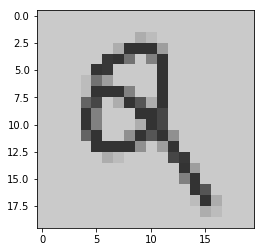

In [31]:
c=253-gray
carr=c.reshape((1,400))
g=cv2.cvtColor(gray,cv2.COLOR_GRAY2BGR)
plt.imshow(g)

In [32]:

digit_pre=sigmoid(x_test,p,b)


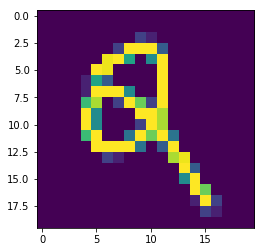

In [33]:
f=202-gray
plt.imshow(f)

In [34]:
f=f.reshape((1,400))

In [35]:
k=x_train[0]

In [36]:
k=k.reshape((20,20))

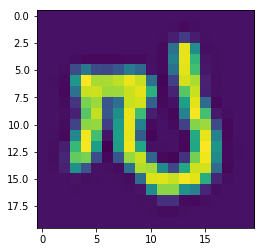

In [37]:
plt.imshow(k)

In [38]:
y_train[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

#### Building the model in Neural Networks

In [31]:
# we x_train,y_train data
# we have read the parameters of each layeer
# In this network we have the layers each layer consists of the neurons units





# Reading the already given weights of input layer and hiddien layers
w_data=scipy.io.loadmat("ex3weights.mat")

# reading the weights of 1st layer
w_layer1=w_data["Theta1"]
w_layer2=w_data["Theta2"]

In [32]:
# shapes of the weights
print("the shape of the layer1 weights is :",w_layer1.shape)
print("the shape of the layer2 weights is :",w_layer2.shape)

the shape of the layer1 weights is : (25, 401)
the shape of the layer2 weights is : (10, 26)


In [33]:
h_bias=w_layer1[:,0]
o_bias=w_layer2[:,0]
h_para=w_layer1[:,1:]
o_para=w_layer2[:,1:]

In [34]:
# now the shapes of the bias and weights
h_bias=h_bias.reshape((25,1))
o_bias=o_bias.reshape((10,1))
print("Hidden layer shape of weights and bias  :",h_para.shape,h_bias.shape)
print("Output layer shape of the weights and bias :",o_para.shape,o_bias.shape)
print("Training shapes x_test and y_test :",x_test.shape,y_test.shape)

Hidden layer shape of weights and bias  : (25, 400) (25, 1)
Output layer shape of the weights and bias : (10, 25) (10, 1)
Training shapes x_test and y_test : (1000, 400) (1000, 10)


In [45]:
# Forward propagation
def sigmoid(activations,para,bias):
    z=np.dot(activations,para.T)+bias.T
    return (1/(1+np.exp(-z)))
def neural_networks(features,h_para,h_bias,o_para,o_bias):
    # hidden layer generating the activations for the inputs of input layer
    a_h=sigmoid(features,h_para,h_bias)
    a_o=sigmoid(a_h,o_para,o_bias)
    return a_o
y_predict=neural_networks(x_test,h_para,h_bias,o_para,o_bias)

In [46]:
y_predict

array([[1.88265895e-04, 2.83274629e-02, 3.72551833e-02, ...,
        1.94533220e-04, 1.50632687e-04, 9.29308701e-01],
       [3.37953183e-01, 2.20928317e-04, 4.20586451e-04, ...,
        1.18055451e-02, 1.74867413e-02, 1.41284091e-04],
       [3.56033036e-03, 3.01820376e-04, 9.90303059e-03, ...,
        5.54239368e-03, 9.88570045e-01, 4.17857120e-05],
       ...,
       [8.57404620e-01, 1.19013893e-02, 2.73309095e-03, ...,
        1.33613156e-02, 3.00573875e-04, 5.85525037e-03],
       [9.59608349e-04, 9.92547577e-01, 1.82449251e-02, ...,
        4.54016441e-04, 1.98573445e-04, 1.07485284e-03],
       [3.61914522e-03, 1.76765316e-02, 3.31715611e-04, ...,
        5.96059246e-03, 2.14033266e-04, 4.00018736e-04]])

In [47]:
neu_pre=[]
for i in y_predict:
    k=[]
    for j in i:
        if(j>=0.5):
            k.append(1)
        else:
            k.append(0)
    neu_pre.append(k)

In [48]:
n_num_prect=[]
for i in neu_pre:
    #print(i)
    for k,j in enumerate(i):
        if(j==1):
            n_num_prect.append(k)
            break
        if(k==9 and j==0):
            n_num_prect.append(0)
            


In [49]:
countt=0
for i,j in zip(testing,n_num_prect):
    if(i==j):
        countt+=1
print(countt)

950


In [40]:
3781/4000

0.94525

In [43]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [50]:
neu_pre[0]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]